#### Preparing the tools
* pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation

In [2]:
# EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#### Loading Data

In [3]:
df = pd.read_csv("heart-disease.csv") # 'DataFrame' shortened to 'df'
df.shape 

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Exploratory Analysis**

Let's see what our data set is made up and features' relationships with our target label *target*

In [5]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

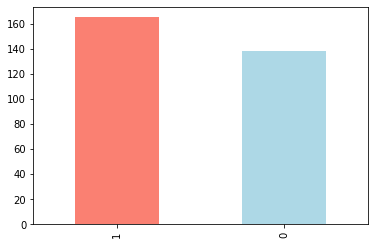

In [6]:
df.target.value_counts().plot(kind='bar', color=["salmon", "lightblue"])

> We have a balanced dataset: Our target variable has a close to even split

**Missing Values**

We check for missing values in our data

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


> We do not record any missing value in our data

Let's get quick overall insights of our data

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#To check for presence of outliers, we take see the distribution of the entire dataset

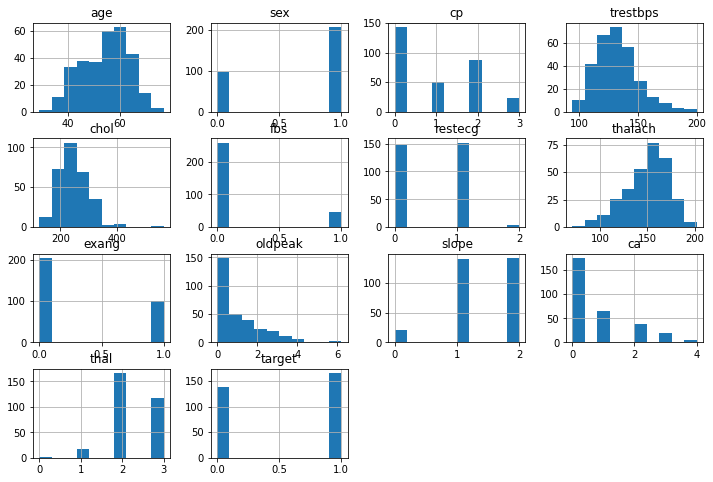

In [11]:
df.hist(figsize=(12,8))
plt.show()

**We plot the distribution of non categorical features**

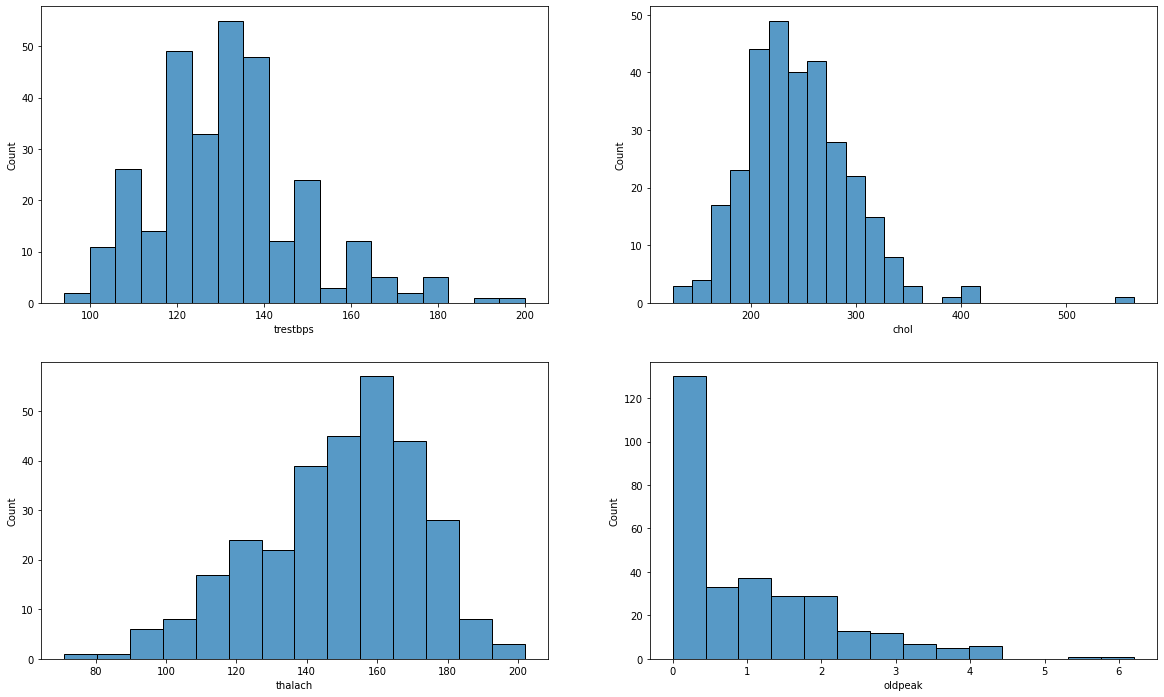

In [12]:
#We plot the distribution of non categorical features


fig, ([ax1,ax2], [ax3,ax4]) = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
sns.histplot(x=df["trestbps"], data=df, ax=ax1,)
sns.histplot(x=df["chol"], data=df, ax=ax2,)
sns.histplot(x=df["thalach"], data=df, ax=ax3,)
sns.histplot(x=df["oldpeak"], data=df, ax=ax4,)

plt.show()

To see the fraction of our target across categorical features

In [13]:
#To see our target across features
#target versus sex(0: Female, 1:Male)

pd.crosstab(df.sex, df.target)


target,0,1
sex,,
0,24,72
1,114,93


There are a total of 96 females and 207 males in our dataset(), yet...

> (72/96) * 100 = 75% of the female records are diagnosed with heart disease.

That is there is a 75% chance that if a participant is female, she has heart disease as compared with the
> (93/207) * 100 = 45% of a male participant having heart disease

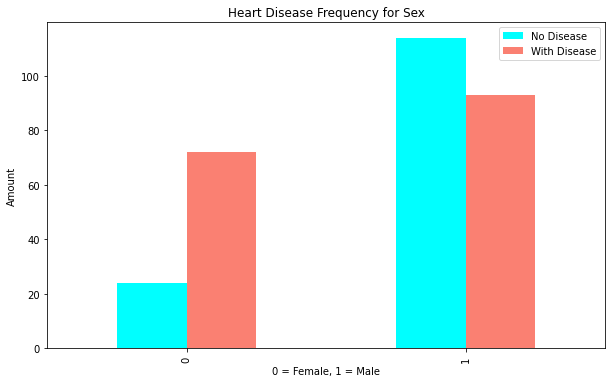

In [14]:
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(10,6), color=["cyan", "salmon"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Amount")
plt.legend(["No Disease", "With Disease"])

Next, we see our target versus cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

Typical (classic) angina chest pain consists of (1)**Substernal chest pain** or discomfort that is (2) Provoked by **exertion or emotional stress** and (3) **relieved by rest or nitroglycerine (or both)**.
https://www.ncbi.nlm.nih.gov/pubmed/20494662

Atypical (probable) angina chest pain applies when 2 out of 3 criteria of classic angina are present.

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


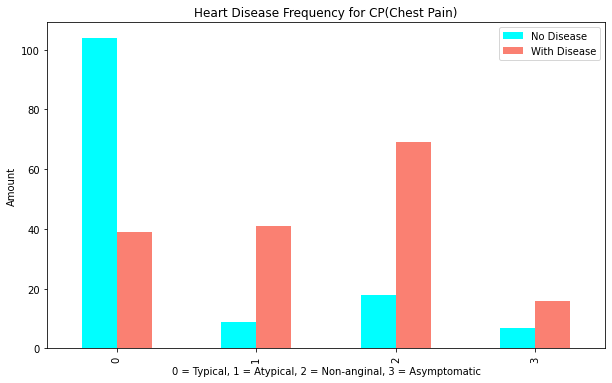

In [16]:
#Let's plot the relationship

pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=["cyan", "salmon"])

plt.title("Heart Disease Frequency for CP(Chest Pain)")
plt.xlabel("0 = Typical, 1 = Atypical, 2 = Non-anginal, 3 = Asymptomatic")
plt.ylabel("Amount")
plt.legend(["No Disease", "With Disease"])

It's interesting the atypical agina (value 1) and Non-anginal pain(value2) states that it's not related to the heart but seems to have a high ratios of participants with heart disease than not.

> *Does this graph shows a confusion of data, need for more data or need of a subject matter expert?*

##### Moving on to **Fasting Blood Sugar, fbs**

Target versus fbs(fasting blood sugar) > 120 mg/dl) 
(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* Note: '>126' mg/dL signals diabetes

In [17]:
pd.crosstab(df.fbs, df.target)

target,0,1
fbs,,
0,116,142
1,22,23


<AxesSubplot:xlabel='fbs', ylabel='Count'>

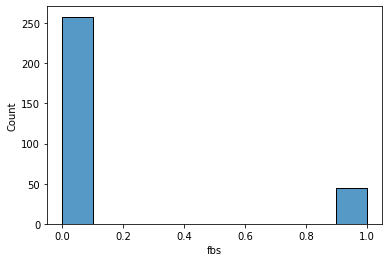

In [18]:
sns.histplot(data=df["fbs"])

In [19]:
df["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

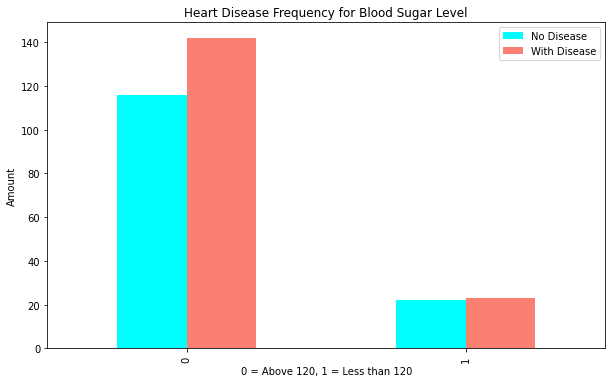

In [20]:
pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(10,6), color=["cyan", "salmon"])

plt.title("Heart Disease Frequency for Blood Sugar Level")
plt.xlabel("0 = Above 120, 1 = Less than 120")
plt.ylabel("Amount")
plt.legend(["No Disease", "With Disease"])

Lets see the correlation of features with the target label to know what features are worth exploring individually

In [21]:
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


- The cp, thalach, exang, and oldpeak are actually the features that are worth analyzing their

relationship with the target


<AxesSubplot:>

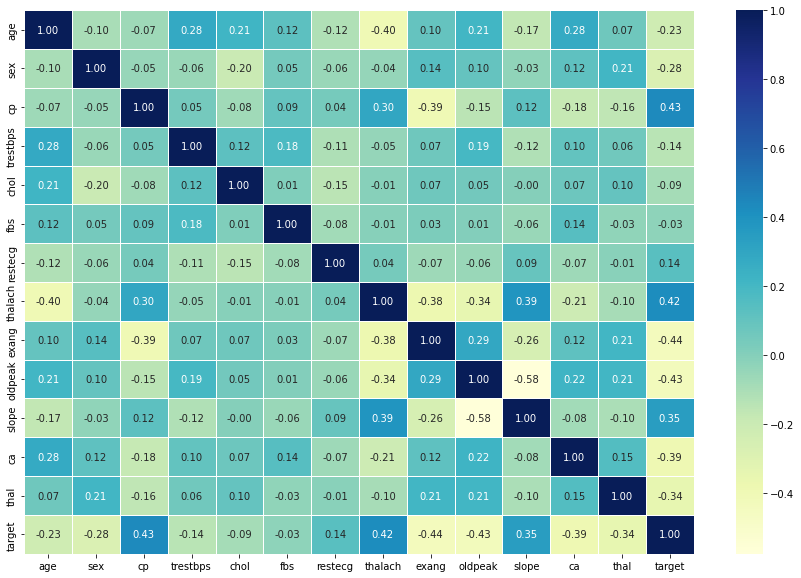

In [22]:
# Let's make it look a little prettier
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")

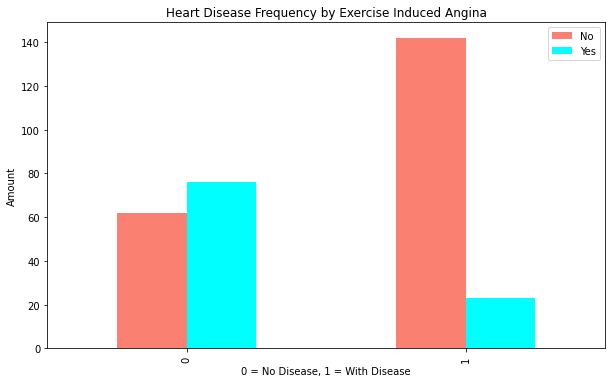

In [23]:
# exang - exercise induced angina (1 = yes; 0 = no)

pd.crosstab(df.target, df.exang).plot(kind='bar', figsize=(10,6), color=["salmon", "cyan"])

plt.title("Heart Disease Frequency by Exercise Induced Angina")
plt.xlabel("0 = No Disease, 1 = With Disease")
plt.ylabel("Amount")
plt.legend(["No", "Yes"])

In [24]:
df["exang"].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [25]:
pd.crosstab(df.target, df.exang)

exang,0,1
target,,
0,62,76
1,142,23


There are 142 heart disease cases not caused by exercise-induced angina and 23 heart disease cases caused by exercise induced angina.

Its safe to say that there are other more prominent causes of angina other than exercise that leads to heart disease.

### Modeling

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
X = df.drop("target", axis=1)
y = df["target"]

In [28]:
np.random.seed(40)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
len(X_train), len(X_test)

(242, 61)

### Model choices
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

* Logistic Regression - LogisticRegression()
* K-Nearest Neighbors - KNeighboursClassifier()
* RandomForest - RandomForestClassifier()

In [30]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(40)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7049180327868853,
 'Logistic Regression': 0.9016393442622951,
 'Random Forest': 0.8360655737704918}

<AxesSubplot:>

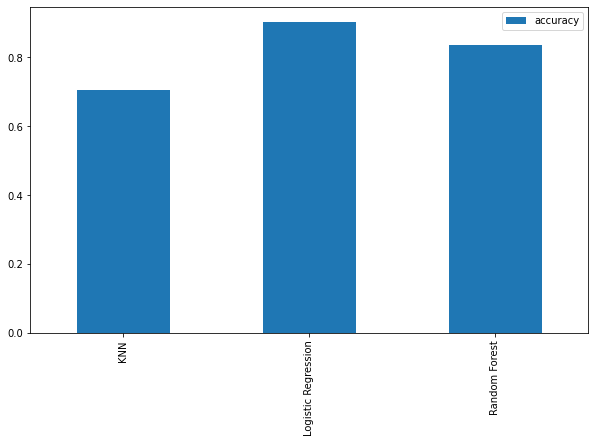

In [32]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='bar', figsize=(10,6))

### Tunning Hyperparameters

* **KNN**

The basic parameter to tune in K Neighbors Classifier is the n_neighors 

Since we will be tunning just one parameter here, we tune by hand

In [33]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [34]:
test_scores

[0.6229508196721312,
 0.5901639344262295,
 0.7049180327868853,
 0.5737704918032787,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.6229508196721312,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.6885245901639344,
 0.6885245901639344]

Maximum KNN score on the test data: 70.49%


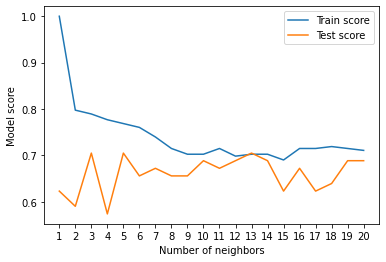

In [35]:
#Let's plot to have a better view

plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

The best score on the test data using Knn is 70.49% at 13-neighbors...

Not such great accuracy to trust your heart condition to🤕🤕🤕 

* Tunning our **RandomForestClassifier** model and **LogisticRegression** model with 

**RandonizedSearchCv**

In [36]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

RandomizedSearch for Logistic Regression

In [37]:
# Setup random seed
np.random.seed(40)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [39]:
rs_log_reg.score(X_test, y_test)

0.9016393442622951

RandomizedSearch for Random Forest Classifier

In [40]:
# Setup random seed
np.random.seed(40)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 8,
 'min_samples_leaf': 11,
 'max_depth': 10}

In [42]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8360655737704918

So far the Logistic Regression is taking the lead...

We further tune it exhaustively over various other parameters using GridSearchCV

**GridSearchCv**

In [43]:
log_reg_grid = {"penalty":["l1", "l2"],
                "C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

In [44]:
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [45]:
gs_log_reg.best_params_

{'C': 0.615848211066026, 'penalty': 'l2', 'solver': 'liblinear'}

In [46]:
gs_log_reg.score(X_test, y_test)

0.9016393442622951

That concludes out parameter tunning

**Other Evaluation**

*ROC/AUC*

*Classification Report*

*Confusion metrics*

*Cross_val_score*

#### ROC curve and AUC scores.

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease.

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


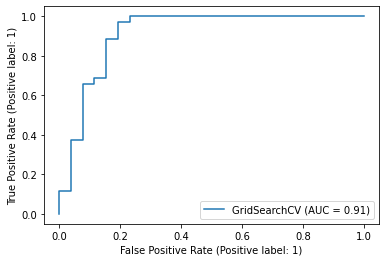

In [47]:
plot_roc_curve(gs_log_reg, X_test, y_test)

Great! 

Our model predits with 9% confusion that a person has heart disease when he actually is without heart disease.

Is this negligible since it predicts with 91% accuracy?

*There is still room for improvement*

#### Confusion Matrix

In [49]:
#The confusion matrix will need predictions from our model

y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [50]:
y_test

18     1
112    1
102    1
275    0
92     1
      ..
288    0
146    1
240    0
167    0
90     1
Name: target, Length: 61, dtype: int64

In [51]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[21  5]
 [ 1 34]]


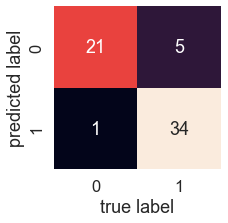

In [52]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

There are 5 occasions where our model predicted the absence of heart disease where it actually is present

And 1 occasion where our model predicted the presence of heart disease where there isn't.

#### Confusion Matrix

In [53]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.87      0.97      0.92        35

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



#### Cross_val_score

In [54]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.615848211066026, 'penalty': 'l2', 'solver': 'liblinear'}

In [55]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [56]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [57]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [58]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [59]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [60]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

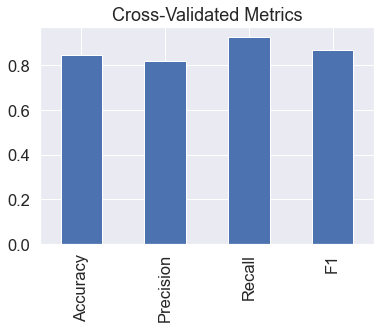

In [61]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

- Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0
- Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct.
- Recall - Indicates the proportion of actual positives which were correctly classified.
- F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

#### Feature importance

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Or for our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

In [62]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [63]:
# Check coef_
clf.coef_

array([[ 0.00896689, -0.84406525,  0.76482548, -0.02171899, -0.00184152,
        -0.1185225 ,  0.38924829,  0.02980951, -0.42230231, -0.44259104,
         0.31387696, -0.62396469, -0.61103581]])

In [64]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.00896689439157223,
 'sex': -0.8440652539199054,
 'cp': 0.764825480360876,
 'trestbps': -0.02171898536635985,
 'chol': -0.0018415150114289576,
 'fbs': -0.11852250211685528,
 'restecg': 0.38924829177765846,
 'thalach': 0.029809511683260348,
 'exang': -0.42230231413261154,
 'oldpeak': -0.44259103684833623,
 'slope': 0.31387696421172,
 'ca': -0.6239646891221831,
 'thal': -0.6110358057632609}

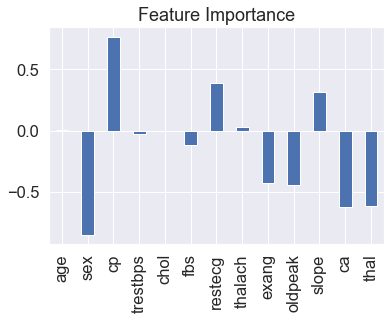

In [65]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.